<a href="https://colab.research.google.com/github/XM2202-02/hello-github-actions/blob/main/T2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

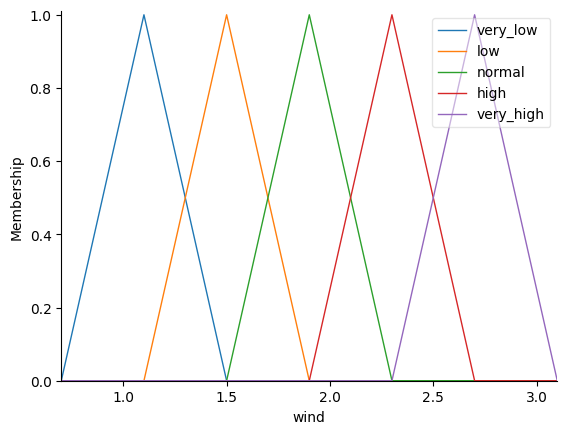

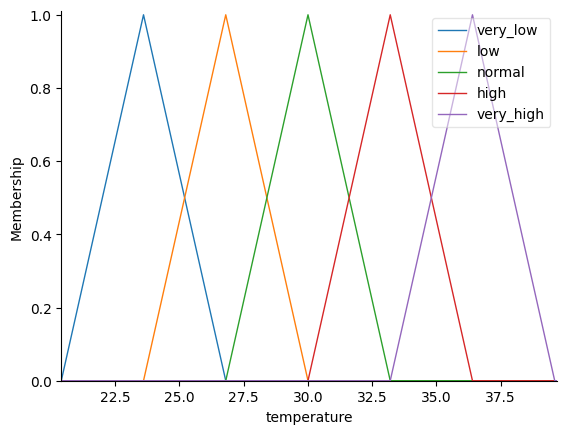

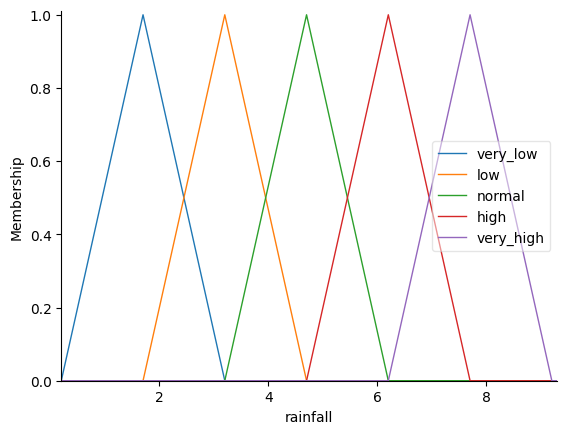

In [3]:
#2.1 Du Doan Mua
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
wind=ctrl.Antecedent(np.arange(0.7,3.1,0.1),'wind')
temperature=ctrl.Antecedent(np.arange(20.4,39.7,0.1),'temperature')
rainfall=ctrl.Consequent(np.arange(0.2,9.3,0.1),'rainfall')
wind['very_low']=fuzz.trimf(wind.universe,[0.7,1.1,1.5])
wind['low']=fuzz.trimf(wind.universe,[1.1,1.5,1.9])
wind['normal']=fuzz.trimf(wind.universe,[1.5,1.9,2.3])
wind['high']=fuzz.trimf(wind.universe,[1.9,2.3,2.7])
wind['very_high']=fuzz.trimf(wind.universe,[2.3,2.7,3.1])
temperature['very_low']=fuzz.trimf(temperature.universe,[20.4,23.6,26.8])
temperature['low']=fuzz.trimf(temperature.universe,[23.6,26.8,30])
temperature['normal']=fuzz.trimf(temperature.universe,[26.8,30,33.2])
temperature['high']=fuzz.trimf(temperature.universe,[30,33.2,36.4])
temperature['very_high']=fuzz.trimf(temperature.universe,[33.2,36.4,39.6])
rainfall['very_low']=fuzz.trimf(rainfall.universe,[0.2,1.7,3.2])
rainfall['low']=fuzz.trimf(rainfall.universe,[1.7,3.2,4.7])
rainfall['normal']=fuzz.trimf(rainfall.universe,[3.2,4.7,6.2])
rainfall['high']=fuzz.trimf(rainfall.universe,[4.7,6.2,7.7])
rainfall['very_high']=fuzz.trimf(rainfall.universe,[6.2,7.7,9.2])
wind.view()
temperature.view()
rainfall.view()

Rainfall: 7.700000000000006


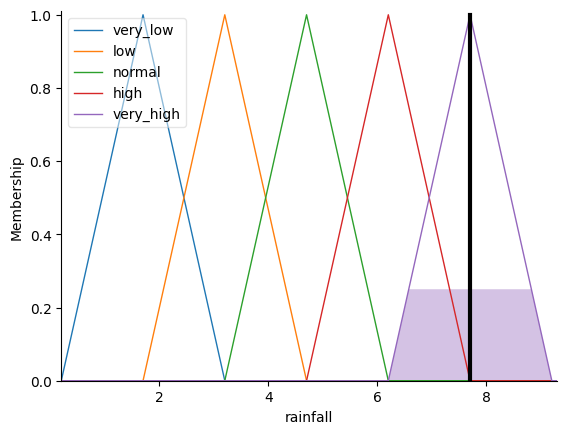

In [4]:
rule1=ctrl.Rule(wind['very_low']|temperature['very_low'],rainfall['very_low'])
rule2=ctrl.Rule(wind['low']|temperature['low'],rainfall['low'])
rule3=ctrl.Rule(wind['normal']|temperature['normal'],rainfall['normal'])
rule4=ctrl.Rule(wind['high']|temperature['high'],rainfall['high'])
rule5=ctrl.Rule(wind['very_high']|temperature['very_high'],rainfall['very_high'])
rule6=ctrl.Rule(wind['very_low']|temperature['low'],rainfall['very_low'])
rule7=ctrl.Rule(wind['low']|temperature['normal'],rainfall['low'])
rule8=ctrl.Rule(wind['normal']|temperature['high'],rainfall['normal'])
rule9=ctrl.Rule(wind['high']|temperature['very_high'],rainfall['high'])
rule10=ctrl.Rule(wind['very_high']|temperature['very_high'],rainfall['very_high'])
rainfall_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10])
rainfall_sim=ctrl.ControlSystemSimulation(rainfall_ctrl)
rainfall_sim.input['wind']=3.0
rainfall_sim.input['temperature']=20
rainfall_sim.compute()
print(f"Rainfall: {rainfall_sim.output['rainfall']}")
rainfall.view(sim=rainfall_sim)